# U.S. Medical Insurance Costs

Sunday 13 March 2022

In [64]:
# import the data into a dictionary and then import into seperate lists

import csv

file_path = "/Volumes/GoogleDrive/My Drive/CodeAcademy/DataScience/python-portfolio-project-starter-files/data/insurance.csv" # windows
file_path = "G:\My Drive\CodeAcademy\DataScience\python-portfolio-project-starter-files\data/insurance.csv"
fieldnames=["age", "sex", "bmi", "children", "smoker", "region", "charges"]


age_list = []
sex_list= []
bmi_list = []
children_list = []
smoker_list = []
region_list = []
charges_list = []

with open(file_path) as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        age_list.append(row["age"])
        sex_list.append(row["sex"])
        bmi_list.append(row["bmi"])
        children_list.append(row["children"])
        smoker_list.append(row["smoker"])
        region_list.append(row["region"])
        charges_list.append(row["charges"])
    


In [65]:
# Cast the string fields of age, chidren, charges to int or float using list comprehensions

age_list = [int(x) for x in age_list]
bmi_list = [float(x) for x in bmi_list]
charges_list = [float(x) for x in charges_list]
children_list = [int(x) for x in children_list]

# convert sex to int, where 1 = male and 0 = female,using dummy variables

sex_list = [1 if x == "male" else 0 for x in sex_list]

# convert sex to int, where 1 = male and 0 = female,using dummy variables

smoker_list = [1 if x == "yes" else 0 for x in smoker_list]

# optional - convert regions to shortcode i.e. SE is Southeast

shortcode_regions_list = []
for region in region_list:
    if region == "southwest":
        shortcode_regions_list.append("SW")
    elif region == "southeast":
        shortcode_regions_list.append("SE")
    elif region == "northeast":
        shortcode_regions_list.append("NE")
    elif region == "northwest":
        shortcode_regions_list.append("NW")
    else:
        shortcode_regions_list.append('-999')



In [66]:
import pandas as pd
import matplotlib.pyplot as plt


In [67]:
url = 'G:\My Drive\CodeAcademy\DataScience\python-portfolio-project-starter-files\python-portfolio-example-solution\insurance.csv'
insurance = pd.read_csv(url, dtype={'age': 'int8',  'bmi': 'float32', 'children' : 'int8'})


In [68]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900000,0,yes,southwest,16884.92400
1,18,male,33.770000,1,no,southeast,1725.55230
2,28,male,33.000000,3,no,southeast,4449.46200
3,33,male,22.705000,0,no,northwest,21984.47061
4,32,male,28.879999,0,no,northwest,3866.85520


In [69]:
insurance.shape

(1338, 7)

In [70]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int8   
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float32
 3   children  1338 non-null   int8   
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float32(1), float64(1), int8(2), object(3)
memory usage: 49.8+ KB


In [71]:
insurance.sex.replace(('male', 'female'), (1, 0), inplace=True)
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int8   
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float32
 3   children  1338 non-null   int8   
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float32(1), float64(1), int64(1), int8(2), object(2)
memory usage: 49.8+ KB


In [72]:
insurance.smoker.replace(('yes', 'no'), (1, 0), inplace=True)
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int8   
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float32
 3   children  1338 non-null   int8   
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float32(1), float64(1), int64(2), int8(2), object(1)
memory usage: 49.8+ KB


In [73]:
insurance.region.replace(('northeast', 'southeast', 'southwest', 'northwest'), (0, 1, 2, 3), inplace=True)
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int8   
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float32
 3   children  1338 non-null   int8   
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float32(1), float64(1), int64(3), int8(2)
memory usage: 49.8 KB


In [74]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [75]:
insurance.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663391,1.094918,0.204783,1.486547,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104915,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296251,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130001,5.000000,1.000000,3.000000,63770.428010


In [76]:
ins_by_region = insurance.groupby('region').age.count().reset_index()
ins_by_region.rename(columns={'age': 'count'}, inplace=True)

We have slightly more people in region 2 (i.e. southwest), the other are roughly equal, 365 Vs 325

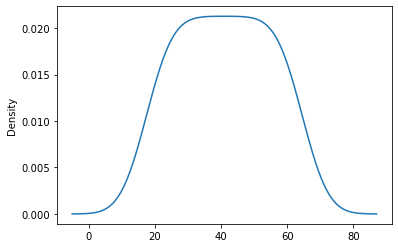

In [129]:
ins_by_age = insurance.groupby('age').sex.count().reset_index()
ins_by_age.rename(columns={'sex': 'count'}, inplace=True)
ins_by_age.age.plot.kde()
plt.show()


<AxesSubplot:xlabel='sex'>

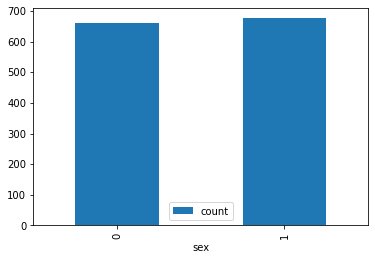

In [117]:
ins_by_sex = insurance.groupby('sex').age.count().reset_index()
ins_by_sex.rename(columns={'age': 'count'}, inplace=True)
ins_by_sex.plot.bar(x='sex', y='count')

<AxesSubplot:xlabel='smoker'>

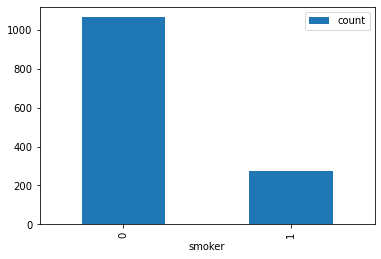

In [118]:
ins_by_smoker = insurance.groupby('smoker').sex.count().reset_index()
ins_by_smoker.rename(columns={'sex': 'count'}, inplace=True)
ins_by_smoker.plot.bar(x='smoker', y='count')

There are more non-smokers in the data than smokers, roughly 3.8 times more non-smokers than smokers

<AxesSubplot:xlabel='children'>

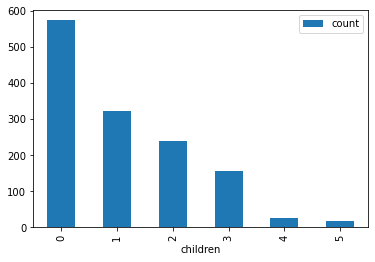

In [119]:
ins_by_num_children = insurance.groupby('children').age.count().reset_index()
ins_by_num_children.rename(columns={'age': 'count'}, inplace=True)
ins_by_num_children.plot.bar(x='children', y='count')
